In [1]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Counter


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymorphy2
import bs4
import requests
from collections import Counter
import re

In [8]:
def pymorphy2_311_hotfix():
    from inspect import getfullargspec
    from pymorphy2.units.base import BaseAnalyzerUnit

    def _get_param_names_311(klass):
        if klass.__init__ is object.__init__:
            return []
        args = getfullargspec(klass.__init__).args
        return sorted(args[1:])

    setattr(BaseAnalyzerUnit, '_get_param_names', _get_param_names_311)

In [10]:
from dask.distributed import Client

In [14]:
client = Client(n_workers = 4, threads_per_worker = 4, processes = True, memory_limit = '2GB')


In [16]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52705,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:52725,Total threads: 4
Dashboard: http://127.0.0.1:52728/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:52708,


In [18]:
import bs4
import dask.bag as db
import requests
import string
url = "http://www.lib.ru/POEZIQ/TWARDOWSKIJ/as_ter.txt"
response = requests.get(url)
soup = bs4.BeautifulSoup(response.text,'lxml')
text = soup.body.get_text(' ', strip=True)

# получение текста с URL

In [36]:
translator = str.maketrans('', '', string.punctuation)
cleaned_text = text.translate(translator).lower()

# Предобработка текста:удалим пунктуацию 

In [38]:
words = cleaned_text.split()

# Разделим текст на слова

In [34]:
words

['fb2zip',
 'epub',
 'содержание',
 'fine',
 'html',
 'printed',
 'version',
 'txtwordкпк',
 'libru',
 'html',
 'александр',
 'твардовский',
 'как',
 'был',
 'написан',
 'василий',
 'теркин',
 'ответ',
 'читателям',
 'ocr',
 'кудрявцев',
 'гг',
 'первые',
 'главы',
 'василия',
 'теркина',
 'были',
 'опубликованы',
 'в',
 '1942',
 'году',
 'хотя',
 'имя',
 'героя',
 'книги',
 'было',
 'известно',
 'по',
 'военной',
 'печати',
 'значительно',
 'ранее',
 'но',
 'именно',
 'с',
 '1942',
 'года',
 'я',
 'как',
 'автор',
 'книги',
 'про',
 'бойца',
 'получаю',
 'читательские',
 'письма',
 'в',
 'которых',
 'вместе',
 'с',
 'общей',
 'оценкой',
 'этого',
 'произведения',
 'высказываются',
 'замечания',
 'пожелания',
 'выдвигаются',
 'вопросы',
 'их',
 'нельзя',
 'оставить',
 'без',
 'ответа',
 'в',
 'моей',
 'частной',
 'переписке',
 'с',
 'читателями',
 'я',
 'конечно',
 'старался',
 'всякий',
 'раз',
 'хоть',
 'коротко',
 'отозваться',
 'на',
 'все',
 'эти',
 'вопросы',
 'замечания',
 'и',


In [40]:
word_counts = Counter(words)

# Подсчёт частоты слов

In [42]:
word_counts

Counter({'в': 436,
         'и': 419,
         'не': 205,
         'с': 156,
         'я': 155,
         'на': 143,
         'что': 136,
         'как': 105,
         'а': 97,
         'теркин': 88,
         'теркина': 82,
         'это': 79,
         'но': 75,
         'из': 69,
         'было': 67,
         'к': 67,
         'по': 64,
         'о': 61,
         'так': 58,
         'он': 50,
         'мне': 49,
         'бы': 49,
         'все': 47,
         'его': 40,
         'для': 40,
         'то': 39,
         'или': 38,
         'книги': 35,
         'меня': 35,
         'был': 34,
         'уже': 34,
         'еще': 33,
         'василий': 32,
         'за': 31,
         'от': 31,
         'была': 29,
         'том': 29,
         'до': 28,
         'же': 28,
         'героя': 27,
         'про': 27,
         'только': 26,
         'ее': 26,
         'бойца': 24,
         'у': 24,
         'быть': 24,
         'войны': 24,
         'этой': 23,
         'их': 22,
         'во': 

In [28]:
most_common_words = word_counts.most_common(10)

# Получение 10 самых частых слов

In [30]:
most_common_words

[('в', 436),
 ('и', 419),
 ('не', 205),
 ('с', 156),
 ('я', 155),
 ('на', 143),
 ('что', 136),
 ('как', 105),
 ('а', 97),
 ('теркин', 88)]

In [48]:
words, counts = zip(*most_common_words)

# Разделим слова и их частоты для построения гистограммы

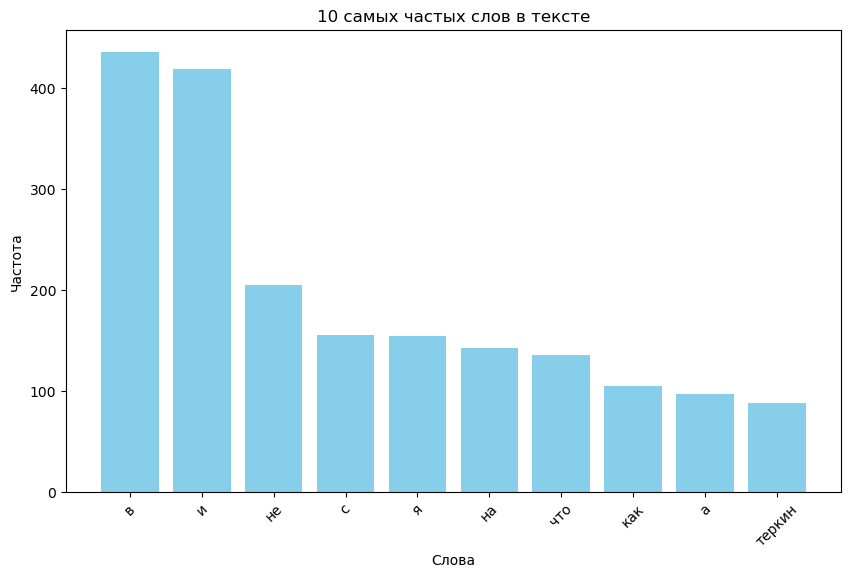

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('10 самых частых слов в тексте')
plt.xticks(rotation=45)
plt.show()

# Вывод: самое часто встречаемое слово "В" встречается более 436 раз, самое редко встречаемое слово "Теркин" встречается менее 88 раз.